# Steps to solve Emergency vs Non-Emergency vehicle classification problem

<ol>1. Loading the dataset</ol>
<ol>2. Pre-processing the data</ol>
<ol>3. Creating training and validation set</ol>
<ol>4. Defining the model architecture</ol>
<ol>5. Compiling the model</ol>
<ol>6. Training the model</ol>
<ol>7. Evaluating model performance</ol>

## 1. Loading the dataset

In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
from glob import glob # for reading multiple images together
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split

In [2]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [3]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [4]:
# looking at first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [5]:
# distribution of classes in the dataset
data['emergency_or_not'].value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

In [6]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [7]:
# shape of the image
X.shape
# gives total images, height, width and channels

(2352, 224, 224, 3)

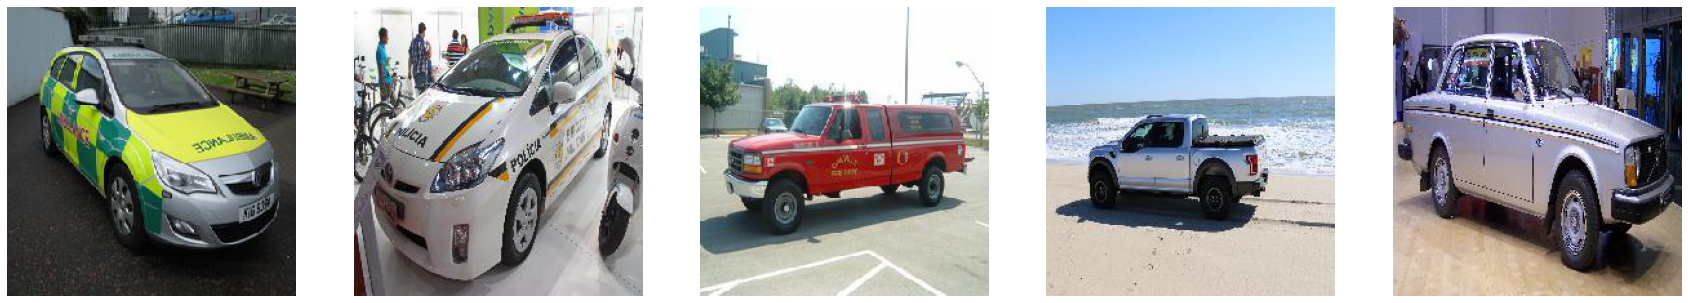

In [8]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(30,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

## 2. Pre-processing the data

In [9]:
# converting 3 dimensional image to 1 dimensional image so they can be fed to the network
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [10]:
# minimum and maximum pixel values of images
X.min(), X.max()

(0, 255)

In [11]:
# normalizing the pixel values to bring down computation time
X = X / X.max()

In [12]:
# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [13]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [14]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

In [15]:
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [16]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               15052900  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


## 5. Compiling the model

In [17]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy', 'Precision', 'Recall'])

## 6. Training the model

In [18]:
# training the model
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 6s 444ms/step - loss: 0.7795 - accuracy: 0.5759 - precision: 0.4784 - recall: 0.2761 - val_loss: 0.6510 - val_accuracy: 0.6190 - val_precision: 0.5506 - val_recall: 0.7194
Epoch 2/50
13/13 [==============================] - 2s 174ms/step - loss: 0.6378 - accuracy: 0.6519 - precision: 0.6216 - recall: 0.4053 - val_loss: 0.6171 - val_accuracy: 0.6714 - val_precision: 0.7097 - val_recall: 0.4258
Epoch 3/50
13/13 [==============================] - 2s 161ms/step - loss: 0.6361 - accuracy: 0.6440 - precision: 0.6004 - recall: 0.4170 - val_loss: 0.6231 - val_accuracy: 0.6586 - val_precision: 0.8286 - val_recall: 0.2806
Epoch 4/50
13/13 [==============================] - 2s 154ms/step - loss: 0.6332 - accuracy: 0.6452 - precision: 0.6013 - recall: 0.4229 - val_loss: 0.6018 - val_accuracy: 0.6898 - val_precision: 0.6743 - val_recall: 0.5677
Epoch 5/50
13/13 [==============================] - 2s 160ms/step - loss: 0.6100 - accuracy: 0.6762 - pr

13/13 [==============================] - 3s 226ms/step - loss: 0.5007 - accuracy: 0.7600 - precision: 0.7407 - recall: 0.6461 - val_loss: 0.5385 - val_accuracy: 0.7125 - val_precision: 0.7220 - val_recall: 0.5613
Epoch 38/50
13/13 [==============================] - 3s 213ms/step - loss: 0.4823 - accuracy: 0.7691 - precision: 0.7463 - recall: 0.6696 - val_loss: 0.5406 - val_accuracy: 0.7139 - val_precision: 0.7500 - val_recall: 0.5226
Epoch 39/50
13/13 [==============================] - 2s 183ms/step - loss: 0.4395 - accuracy: 0.8098 - precision: 0.8183 - recall: 0.6946 - val_loss: 0.5327 - val_accuracy: 0.7195 - val_precision: 0.7014 - val_recall: 0.6290
Epoch 40/50
13/13 [==============================] - 3s 249ms/step - loss: 0.4683 - accuracy: 0.7758 - precision: 0.7583 - recall: 0.6725 - val_loss: 0.5598 - val_accuracy: 0.7195 - val_precision: 0.6429 - val_recall: 0.8129
Epoch 41/50
13/13 [==============================] - 3s 225ms/step - loss: 0.4504 - accuracy: 0.8007 - precision

## 7. Evaluating model performance

In [19]:
# getting predictions in the form of class as well as probabilities
predictions = model.predict_classes(X_valid)[:, 0]
prediction_probabilities = model.predict(X_valid)[:, 0]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [20]:
# accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, predictions))

Accuracy on validation set: 0.7124645892351275


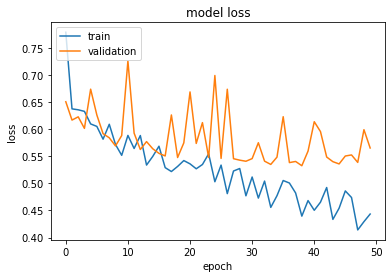

In [21]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
metrics = list(model_history.history.keys())
metrics.remove("loss")
metrics.remove("val_loss")

def plotMetric(model_history, metric):
    plt.figure(figsize=(9,6))
    plt.plot(model_history.history[metric])
    val_metric = "val_"+str(metric)
    plt.plot(model_history.history[val_metric])
    plt.title('model ' + str(metric))
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc="best")
    plt.show()

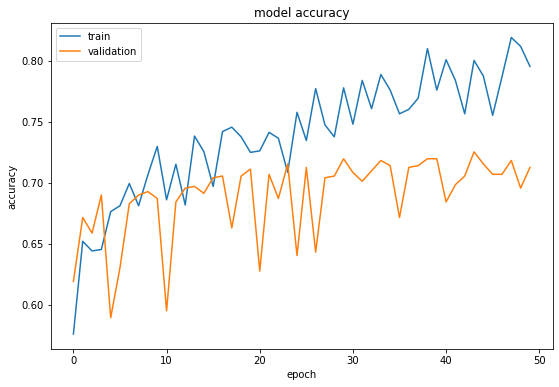

In [23]:
plotMetric(model_history, 'accuracy')

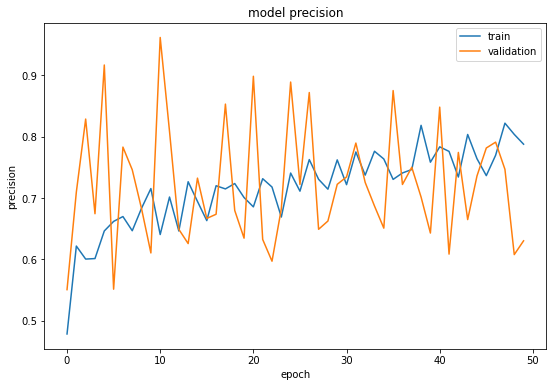

In [24]:
plotMetric(model_history, "precision")

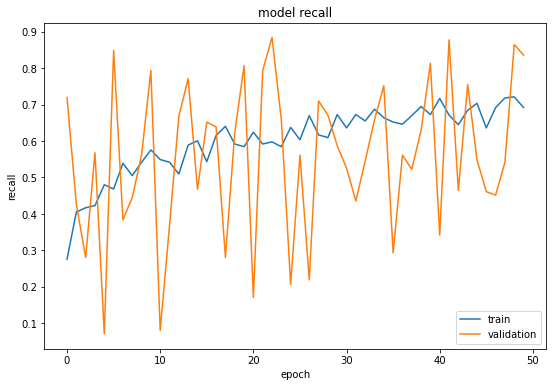

In [25]:
plotMetric(model_history, "recall")

Model is 50 % sure that it is emergency
Predicted class is: 1
And actual class is: 0


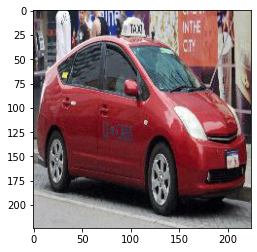

In [26]:
# pull out the original images from the data which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]
pred_class = predictions[index]

# read the image
img = plt.imread('Dataset/images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is emergency')
print("Predicted class is:", pred_class)
print('And actual class is:', valid_y[index])

# plot image
plt.imshow(img)

# Hyperparameter tuning of neural networks

<ol>1. change activation function of hidden layer</ol>
<ol>2. increase hidden neurons</ol>
<ol>3. increase hidden layers</ol>
<ol>4. increase number of epochs</ol>
<ol>5. change optimizer</ol>

### 1. Changing activation function of hidden layer

In [27]:
# using relu as activation function in hidden layer
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy', 'Precision', 'Recall'])

In [28]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [29]:
# training the model for 50 epochs
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 5s 418ms/step - loss: 1.2597 - accuracy: 0.5103 - precision: 0.4242 - recall: 0.5140 - val_loss: 0.6926 - val_accuracy: 0.5552 - val_precision: 0.4000 - val_recall: 0.0258
Epoch 2/50
13/13 [==============================] - 3s 214ms/step - loss: 0.6878 - accuracy: 0.6100 - precision: 0.6066 - recall: 0.1630 - val_loss: 0.6774 - val_accuracy: 0.5751 - val_precision: 0.7083 - val_recall: 0.0548
Epoch 3/50
13/13 [==============================] - 2s 188ms/step - loss: 0.6693 - accuracy: 0.6118 - precision: 0.6010 - recall: 0.1836 - val_loss: 0.6559 - val_accuracy: 0.6147 - val_precision: 0.8393 - val_recall: 0.1516
Epoch 4/50
13/13 [==============================] - 2s 182ms/step - loss: 0.6474 - accuracy: 0.6148 - precision: 0.5791 - recall: 0.2526 - val_loss: 0.6325 - val_accuracy: 0.6572 - val_precision: 0.7329 - val_recall: 0.3452
Epoch 5/50
13/13 [==============================] - 2s 184ms/step - loss: 0.6346 - accuracy: 0.6458 - pr

13/13 [==============================] - 3s 249ms/step - loss: 0.5037 - accuracy: 0.7533 - precision: 0.7691 - recall: 0.5771 - val_loss: 0.5971 - val_accuracy: 0.6955 - val_precision: 0.6128 - val_recall: 0.8323
Epoch 38/50
13/13 [==============================] - 3s 218ms/step - loss: 0.5037 - accuracy: 0.7558 - precision: 0.7514 - recall: 0.6123 - val_loss: 0.6278 - val_accuracy: 0.6827 - val_precision: 0.5951 - val_recall: 0.8677
Epoch 39/50
13/13 [==============================] - 3s 248ms/step - loss: 0.5267 - accuracy: 0.7369 - precision: 0.7095 - recall: 0.6167 - val_loss: 0.6356 - val_accuracy: 0.6686 - val_precision: 0.8519 - val_recall: 0.2968
Epoch 40/50
13/13 [==============================] - 3s 212ms/step - loss: 0.4924 - accuracy: 0.7631 - precision: 0.7594 - recall: 0.6256 - val_loss: 0.6308 - val_accuracy: 0.6827 - val_precision: 0.8162 - val_recall: 0.3581
Epoch 41/50
13/13 [==============================] - 3s 227ms/step - loss: 0.5109 - accuracy: 0.7546 - precision

In [30]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]))

Accuracy on validation set: 0.7181303116147308


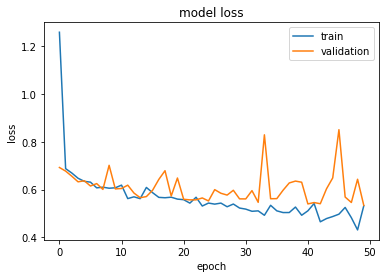

In [31]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

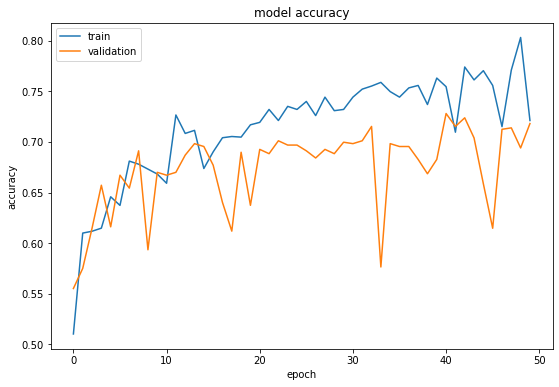

In [32]:
plotMetric(model_history, "accuracy")

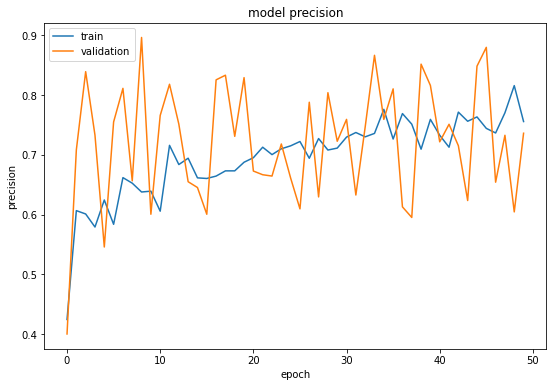

In [33]:
plotMetric(model_history, "precision")

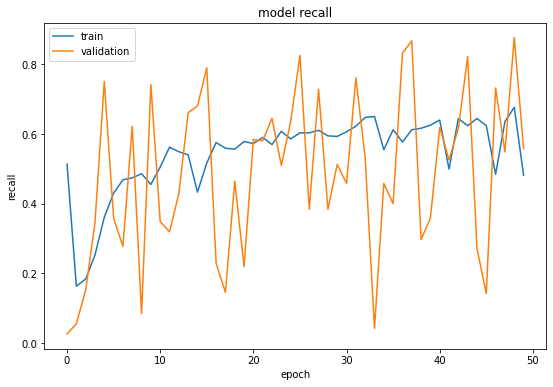

In [34]:
plotMetric(model_history, "recall")

### 2. Increasing hidden neurons

In [35]:
# increase hidden neurons
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy', 'Precision', 'Recall'])

In [36]:
# model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              154141696 
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1025      
Total params: 154,142,721
Trainable params: 154,142,721
Non-trainable params: 0
_________________________________________________________________


In [37]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 22s 2s/step - loss: 1.6238 - accuracy: 0.5115 - precision: 0.4102 - recall: 0.4126 - val_loss: 1.1524 - val_accuracy: 0.5609 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
13/13 [==============================] - 15s 1s/step - loss: 0.7023 - accuracy: 0.6027 - precision: 0.5263 - recall: 0.3965 - val_loss: 0.6488 - val_accuracy: 0.6062 - val_precision: 0.8478 - val_recall: 0.1258
Epoch 3/50
13/13 [==============================] - 13s 1s/step - loss: 0.6635 - accuracy: 0.6081 - precision: 0.5372 - recall: 0.3818 - val_loss: 0.6626 - val_accuracy: 0.5836 - val_precision: 0.5147 - val_recall: 0.9065
Epoch 4/50
13/13 [==============================] - 13s 1s/step - loss: 0.6317 - accuracy: 0.6416 - precision: 0.5857 - recall: 0.4567 - val_loss: 0.6045 - val_accuracy: 0.6785 - val_precision: 0.6317 - val_recall: 0.6419
Epoch 5/50
13/13 [==============================] - 14s 1s/step - loss: 0.6009 - accuracy: 0.6817 - prec

Epoch 38/50
13/13 [==============================] - 17s 1s/step - loss: 0.4911 - accuracy: 0.7710 - precision: 0.7397 - recall: 0.6887 - val_loss: 0.5674 - val_accuracy: 0.6969 - val_precision: 0.7824 - val_recall: 0.4290
Epoch 39/50
13/13 [==============================] - 17s 1s/step - loss: 0.4627 - accuracy: 0.7916 - precision: 0.7836 - recall: 0.6858 - val_loss: 0.5350 - val_accuracy: 0.7181 - val_precision: 0.7033 - val_recall: 0.6194
Epoch 40/50
13/13 [==============================] - 14s 1s/step - loss: 0.5767 - accuracy: 0.7254 - precision: 0.6924 - recall: 0.6050 - val_loss: 0.5977 - val_accuracy: 0.7011 - val_precision: 0.6117 - val_recall: 0.8742
Epoch 41/50
13/13 [==============================] - 15s 1s/step - loss: 0.5136 - accuracy: 0.7473 - precision: 0.7113 - recall: 0.6549 - val_loss: 0.5594 - val_accuracy: 0.7040 - val_precision: 0.7790 - val_recall: 0.4548
Epoch 42/50
13/13 [==============================] - 14s 1s/step - loss: 0.4715 - accuracy: 0.7861 - precisi

In [38]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]))

Accuracy on validation set: 0.7110481586402266


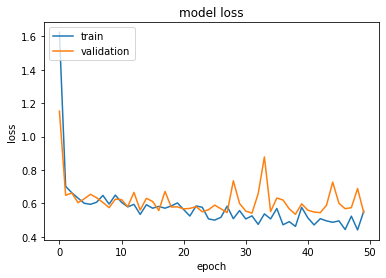

In [39]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

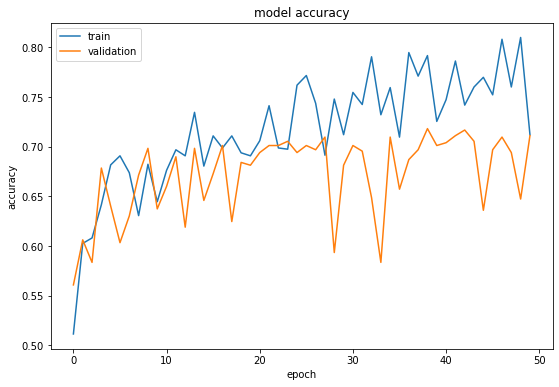

In [40]:
plotMetric(model_history, "accuracy")

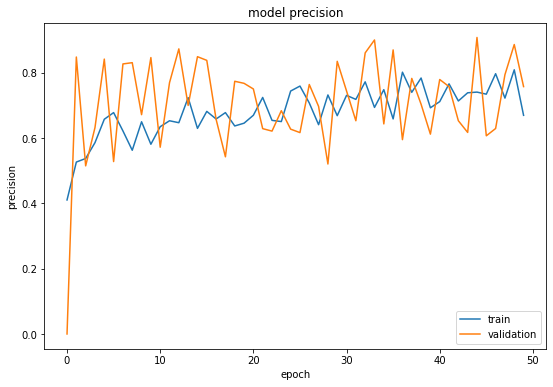

In [41]:
plotMetric(model_history, "precision")

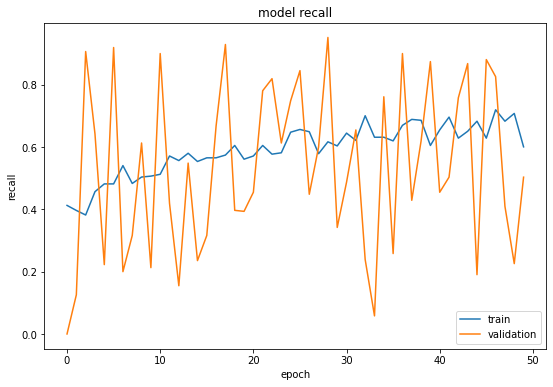

In [42]:
plotMetric(model_history, "recall")

### 3. Increasing hidden layers

In [43]:
# increase hidden layers
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy', 'Precision', 'Recall'])

In [44]:
# model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [45]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/50
13/13 [==============================] - 9s 697ms/step - loss: 0.6755 - accuracy: 0.5857 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6717 - val_accuracy: 0.5609 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
13/13 [==============================] - 2s 165ms/step - loss: 0.6610 - accuracy: 0.5948 - precision: 0.6667 - recall: 0.0411 - val_loss: 0.6581 - val_accuracy: 0.5963 - val_precision: 0.8788 - val_recall: 0.0935
Epoch 3/50
13/13 [==============================] - 2s 186ms/step - loss: 0.6497 - accuracy: 0.6179 - precision: 0.7889 - recall: 0.1043 - val_loss: 0.6475 - val_accuracy: 0.6516 - val_precision: 0.7319 - val_recall: 0.3258
Epoch 4/50
13/13 [==============================] - 2s 179ms/step - loss: 0.6436 - accuracy: 0.6507 - precision: 0.7345 - recall: 0.2438 - val_loss: 0.6406 - val_accuracy: 0.6558 - val_precision: 0.7310 - val_recall: 0.3419
Epoch 5/50
13/13 [==============================] - 2s 178ms/step - loss: 0.6372 - accur

13/13 [==============================] - 2s 180ms/step - loss: 0.5467 - accuracy: 0.7485 - precision: 0.7514 - recall: 0.5859 - val_loss: 0.5731 - val_accuracy: 0.6926 - val_precision: 0.7031 - val_recall: 0.5194
Epoch 38/50
13/13 [==============================] - 2s 165ms/step - loss: 0.5448 - accuracy: 0.7485 - precision: 0.7298 - recall: 0.6226 - val_loss: 0.5941 - val_accuracy: 0.6884 - val_precision: 0.8169 - val_recall: 0.3742
Epoch 39/50
13/13 [==============================] - 2s 155ms/step - loss: 0.5424 - accuracy: 0.7491 - precision: 0.7538 - recall: 0.5844 - val_loss: 0.5680 - val_accuracy: 0.6969 - val_precision: 0.6644 - val_recall: 0.6258
Epoch 40/50
13/13 [==============================] - 2s 155ms/step - loss: 0.5391 - accuracy: 0.7570 - precision: 0.7461 - recall: 0.6256 - val_loss: 0.5706 - val_accuracy: 0.6983 - val_precision: 0.7118 - val_recall: 0.5258
Epoch 41/50
13/13 [==============================] - 2s 160ms/step - loss: 0.5377 - accuracy: 0.7546 - precision

In [46]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.7067988668555241 %


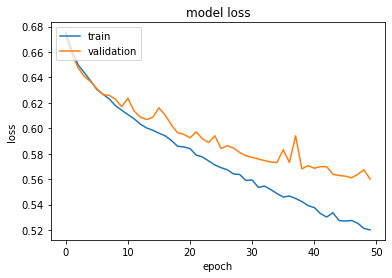

In [47]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

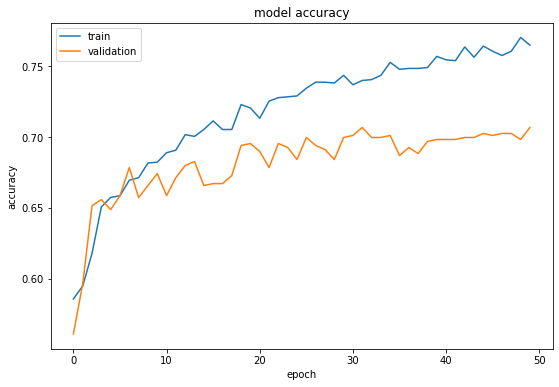

In [48]:
plotMetric(model_history, "accuracy")

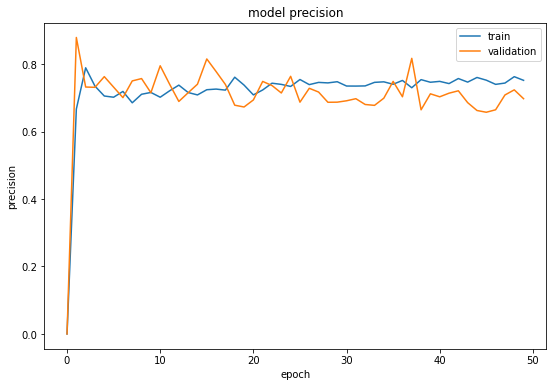

In [49]:
plotMetric(model_history, "precision")

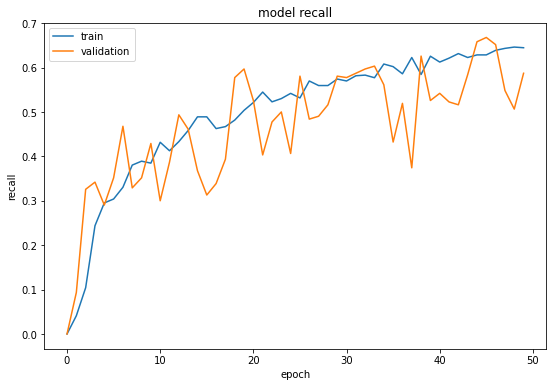

In [50]:
plotMetric(model_history, "recall")

### 4. Increasing number of epochs

In [51]:
# increase number of epochs
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy', 'Precision', 'Recall'])

In [52]:
# model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [53]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 [==============================] - 7s 556ms/step - loss: 0.7772 - accuracy: 0.5674 - precision: 0.4686 - recall: 0.3392 - val_loss: 0.6428 - val_accuracy: 0.6629 - val_precision: 0.6622 - val_recall: 0.4742
Epoch 2/100
13/13 [==============================] - 2s 177ms/step - loss: 0.6430 - accuracy: 0.6403 - precision: 0.6213 - recall: 0.3348 - val_loss: 0.6205 - val_accuracy: 0.6686 - val_precision: 0.7235 - val_recall: 0.3968
Epoch 3/100
13/13 [==============================] - 2s 164ms/step - loss: 0.6252 - accuracy: 0.6622 - precision: 0.6513 - recall: 0.3950 - val_loss: 0.6529 - val_accuracy: 0.6048 - val_precision: 0.5305 - val_recall: 0.8710
Epoch 4/100
13/13 [==============================] - 2s 151ms/step - loss: 0.6373 - accuracy: 0.6422 - precision: 0.5849 - recall: 0.4655 - val_loss: 0.6095 - val_accuracy: 0.6629 - val_precision: 0.7647 - val_recall: 0.3355
Epoch 5/100
13/13 [==============================] - 2s 150ms/step - loss: 0.5912 - accuracy: 0.7005

13/13 [==============================] - 5s 374ms/step - loss: 0.4837 - accuracy: 0.7716 - precision: 0.7512 - recall: 0.6696 - val_loss: 0.5830 - val_accuracy: 0.7054 - val_precision: 0.6214 - val_recall: 0.8419
Epoch 38/100
13/13 [==============================] - 6s 428ms/step - loss: 0.4841 - accuracy: 0.7716 - precision: 0.7496 - recall: 0.6725 - val_loss: 0.5560 - val_accuracy: 0.7096 - val_precision: 0.6364 - val_recall: 0.7903
Epoch 39/100
13/13 [==============================] - 5s 376ms/step - loss: 0.4835 - accuracy: 0.7752 - precision: 0.7562 - recall: 0.6740 - val_loss: 0.5349 - val_accuracy: 0.7266 - val_precision: 0.6811 - val_recall: 0.7097
Epoch 40/100
13/13 [==============================] - 4s 324ms/step - loss: 0.4617 - accuracy: 0.7813 - precision: 0.7601 - recall: 0.6887 - val_loss: 0.7224 - val_accuracy: 0.6303 - val_precision: 0.8889 - val_recall: 0.1806
Epoch 41/100
13/13 [==============================] - 5s 360ms/step - loss: 0.4755 - accuracy: 0.7825 - preci

13/13 [==============================] - 2s 186ms/step - loss: 0.4247 - accuracy: 0.7995 - precision: 0.7970 - recall: 0.6916 - val_loss: 0.5177 - val_accuracy: 0.7351 - val_precision: 0.6965 - val_recall: 0.7032
Epoch 74/100
13/13 [==============================] - 2s 180ms/step - loss: 0.4248 - accuracy: 0.8038 - precision: 0.7797 - recall: 0.7327 - val_loss: 0.5421 - val_accuracy: 0.7181 - val_precision: 0.7789 - val_recall: 0.5000
Epoch 75/100
13/13 [==============================] - 2s 172ms/step - loss: 0.3551 - accuracy: 0.8542 - precision: 0.8718 - recall: 0.7592 - val_loss: 0.5520 - val_accuracy: 0.7323 - val_precision: 0.6547 - val_recall: 0.8258
Epoch 76/100
13/13 [==============================] - 2s 173ms/step - loss: 0.4236 - accuracy: 0.8013 - precision: 0.7810 - recall: 0.7225 - val_loss: 0.5295 - val_accuracy: 0.7238 - val_precision: 0.7578 - val_recall: 0.5452
Epoch 77/100
13/13 [==============================] - 2s 186ms/step - loss: 0.3963 - accuracy: 0.8177 - preci

In [54]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]))

Accuracy on validation set: 0.7478753541076487


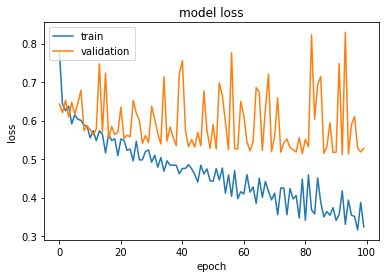

In [55]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

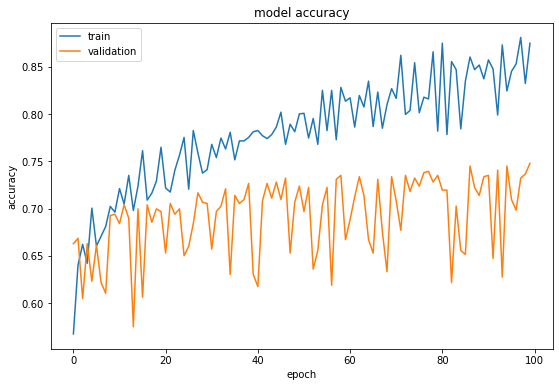

In [56]:
plotMetric(model_history, "accuracy")

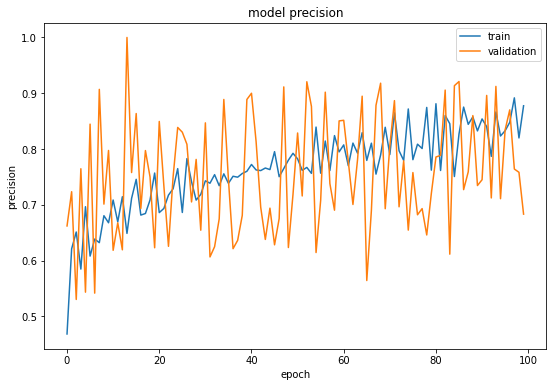

In [57]:
plotMetric(model_history, "precision")

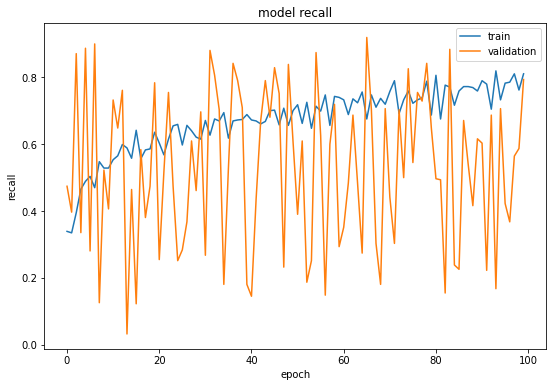

In [58]:
plotMetric(model_history, "recall")

### 5. Changing the optimizer

In [59]:
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

In [60]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

In [61]:
# change optimizer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy', 'Precision', 'Recall'])

In [62]:
# model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 [==============================] - 9s 713ms/step - loss: 0.6532 - accuracy: 0.6148 - precision: 0.6822 - recall: 0.1292 - val_loss: 0.6299 - val_accuracy: 0.6728 - val_precision: 0.6771 - val_recall: 0.4871
Epoch 2/100
13/13 [==============================] - 3s 232ms/step - loss: 0.6269 - accuracy: 0.6586 - precision: 0.6484 - recall: 0.3818 - val_loss: 0.6147 - val_accuracy: 0.6799 - val_precision: 0.6721 - val_recall: 0.5290
Epoch 3/100
13/13 [==============================] - 2s 177ms/step - loss: 0.6099 - accuracy: 0.6810 - precision: 0.6765 - recall: 0.4391 - val_loss: 0.6059 - val_accuracy: 0.6870 - val_precision: 0.7171 - val_recall: 0.4742
Epoch 4/100
13/13 [==============================] - 2s 182ms/step - loss: 0.5995 - accuracy: 0.6920 - precision: 0.6995 - recall: 0.4479 - val_loss: 0.6116 - val_accuracy: 0.6615 - val_precision: 0.7669 - val_recall: 0.3290
Epoch 5/100
13/13 [==============================] - 3s 220ms/step - loss: 0.5929 - accuracy: 0.7072

13/13 [==============================] - 2s 168ms/step - loss: 0.4702 - accuracy: 0.8104 - precision: 0.8070 - recall: 0.7122 - val_loss: 0.5534 - val_accuracy: 0.7125 - val_precision: 0.7202 - val_recall: 0.5645
Epoch 38/100
13/13 [==============================] - 2s 168ms/step - loss: 0.4647 - accuracy: 0.8159 - precision: 0.8214 - recall: 0.7093 - val_loss: 0.5557 - val_accuracy: 0.7153 - val_precision: 0.7380 - val_recall: 0.5452
Epoch 39/100
13/13 [==============================] - 2s 167ms/step - loss: 0.4611 - accuracy: 0.8129 - precision: 0.8033 - recall: 0.7254 - val_loss: 0.5689 - val_accuracy: 0.6941 - val_precision: 0.7582 - val_recall: 0.4452
Epoch 40/100
13/13 [==============================] - 2s 166ms/step - loss: 0.4590 - accuracy: 0.8226 - precision: 0.8092 - recall: 0.7474 - val_loss: 0.5908 - val_accuracy: 0.6870 - val_precision: 0.8112 - val_recall: 0.3742
Epoch 41/100
13/13 [==============================] - 2s 170ms/step - loss: 0.4600 - accuracy: 0.8190 - preci

13/13 [==============================] - 3s 221ms/step - loss: 0.3690 - accuracy: 0.8803 - precision: 0.8929 - recall: 0.8076 - val_loss: 0.5315 - val_accuracy: 0.7167 - val_precision: 0.7236 - val_recall: 0.5742
Epoch 74/100
13/13 [==============================] - 3s 227ms/step - loss: 0.3633 - accuracy: 0.8919 - precision: 0.8961 - recall: 0.8355 - val_loss: 0.5338 - val_accuracy: 0.7195 - val_precision: 0.7353 - val_recall: 0.5645
Epoch 75/100
13/13 [==============================] - 3s 205ms/step - loss: 0.3588 - accuracy: 0.8937 - precision: 0.8978 - recall: 0.8385 - val_loss: 0.5422 - val_accuracy: 0.7224 - val_precision: 0.7740 - val_recall: 0.5194
Epoch 76/100
13/13 [==============================] - 3s 229ms/step - loss: 0.3580 - accuracy: 0.8943 - precision: 0.9030 - recall: 0.8341 - val_loss: 0.5447 - val_accuracy: 0.7210 - val_precision: 0.7756 - val_recall: 0.5129
Epoch 77/100
13/13 [==============================] - 3s 194ms/step - loss: 0.3563 - accuracy: 0.8931 - preci

In [64]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]))

Accuracy on validation set: 0.7294617563739377


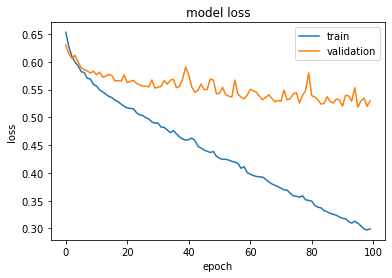

In [65]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

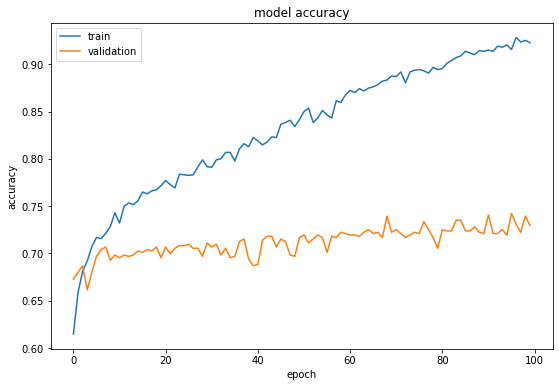

In [66]:
plotMetric(model_history, "accuracy")

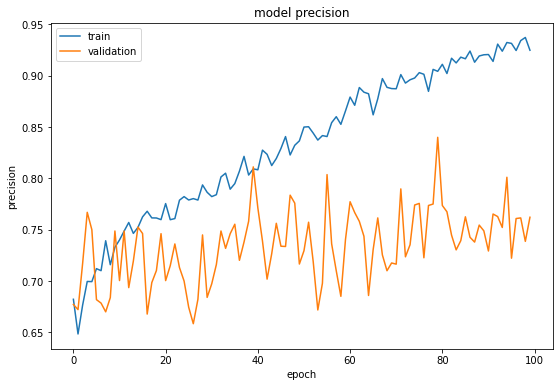

In [67]:
plotMetric(model_history, "precision")

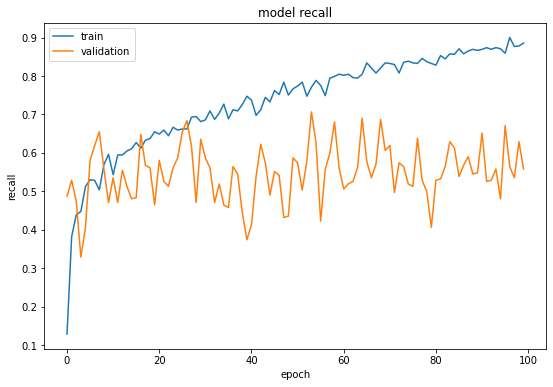

In [68]:
plotMetric(model_history, "recall")